In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [13]:
#show all columns
pd.set_option('display.max_columns', None)

In [14]:
filepath='/Users/rianrachmanto/pypro/project/loan-data/data/raw/loan_final313.csv'
#display all columns
pd.set_option('display.max_columns', None)

def loaddata(pathfile):
    df=pd.read_csv(pathfile)
    print(df.head())
    print(df.columns)
    #drop id
    df=df.drop(['id'],axis=1)
    #reset index
    df=df.reset_index(drop=True)

    #convert issue_d to datetime
    df['issue_d']=pd.to_datetime(df['issue_d'])

    #convert final_d to datetime
    df['final_d'] = pd.to_datetime(df['final_d'], format='%m%d%Y')

    
   
    
    #set x and y
    X=df.drop(['loan_condition_cat'],axis=1)
    y=df['loan_condition_cat']
    #split data
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    return X_train,X_test,y_train,y_test

In [15]:
X_train, X_test, y_train, y_test=loaddata(filepath)

        id  year     issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  01/12/2011  1012015            10.0           RENT   
1  1077430  2011  01/12/2011  1042013             0.5           RENT   
2  1077175  2011  01/12/2011  1062014            10.0           RENT   
3  1076863  2011  01/12/2011  1012015            10.0           RENT   
4  1075358  2011  01/12/2011  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  loan_amount  \
0                   1             Low       24000           1         5000   
1                   1             Low       30000           1         2500   
2                   1             Low       12252           1         2400   
3                   1             Low       49200           1        10000   
4                   1             Low       80000           1         3000   

         term  term_cat application_type  application_type_cat  \
0   36 months         1       IN

In [22]:
def eda(X_train, y_train, X_test, y_test):
    #print shape of X_train and X_test
    print('X_train shape: ',X_train.shape)
    print('X_test shape: ',X_test.shape)

    #print information of X_train
    print('X_train data types: ',X_train.info())

    #print describe of X_train in table
    print('X_train describe: ',X_train.describe())

    
    #print skewness of X_train
    print('X_train skewness: ',X_train.skew())
    
    #check missing value
    print('X_train missing value: ',X_train.isnull().sum())
    print('X_test missing value: ',X_test.isnull().sum())

    #check duplicate value
    print('X_train duplicate value: ',X_train.duplicated().sum())
    print('X_test duplicate value: ',X_test.duplicated().sum())

    #group all numerical variables
    num=X_train.select_dtypes(include=['int64','float64'])
    print('Numerical variables: ',num.columns)

    #group all categorical variables
    cat=X_train.select_dtypes(include=['object'])
    print('Categorical variables: ',cat.columns)

    #boxplot numerical variables with figure size 20,10
    plt.figure(figsize=(25,20))
    sns.boxplot(data=num)

    #remove outliers on annual_inc on X_train using IQR
    Q1=X_train['annual_inc'].quantile(0.25)
    Q3=X_train['annual_inc'].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    X_train=X_train[(X_train['annual_inc']>lower_limit)&(X_train['annual_inc']<upper_limit)]

    #allign y_train
    y_train=y_train[X_train.index]

    #check shape of X_train and y_train
    print('X_train shape after removing outliers: ',X_train.shape)
    print('y_train shape after removing outliers: ',y_train.shape)

    
    #plot pie chart for loan_condition
    plt.figure(figsize=(10,10))
    plt.pie(y_train.value_counts(),labels=['Good Loan','Bad Loan'],autopct='%1.1f%%',shadow=True)

    #plot bar chart for loan_condition
    plt.figure(figsize=(10,10))
    sns.countplot(data=X_train, x='loan_condition')

    #plot histogram for X_train
    X_train.hist(figsize=(20,20))

    #filter with loan_condition is bad loan
    bad_loan=X_train[X_train['loan_condition']=='Bad Loan']

    #plot countplot for bad_loan home_ownership
    plt.figure(figsize=(10,10))
    sns.countplot(data=bad_loan,x='home_ownership')

    #plot countplot for bad_loan purpose income_category
    plt.figure(figsize=(10,10))
    sns.countplot(data=bad_loan, x='income_category')
    
    #plot countplot for bad_loan term
    plt.figure(figsize=(10,10))
    sns.countplot(data=bad_loan, x='term')

    #plot countplot for bad_loan purpose and sort from highest to lowest
    plt.figure(figsize=(25,10))
    sns.countplot(data=bad_loan, x='purpose',order=bad_loan['purpose'].value_counts().index) 

    #plot countplot for bad_loan interest_payments
    plt.figure(figsize=(10,10))
    sns.countplot(data=bad_loan, x='interest_payments')

    #plot countplot for bad_loan interest_payments with hue term
    plt.figure(figsize=(10,10))
    sns.countplot(data=bad_loan, x='interest_payments',hue='term')

    #plot countplot for bad_loan for application_type
    plt.figure(figsize=(10,10))
    sns.countplot(data=bad_loan, x='application_type')

    #plot countplot for X_train for application_type hue loan_condition
    plt.figure(figsize=(10,10))
    sns.countplot(data=X_train, x='application_type',hue='loan_condition')

    #plot histogram for bad_loan
    bad_loan.hist(figsize=(20,20))

    #plot pairplot for bad_loan with figure size 20,20
    plt.figure(figsize=(20,20))
    sns.pairplot(data=bad_loan)

    #plot correlation heatmap for X_train
    plt.figure(figsize=(20,20))
    sns.heatmap(X_train.corr(),annot=True)
    


    


    return X_train, y_train, X_test, y_test








X_train shape:  (709903, 28)
X_test shape:  (177476, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 709903 entries, 329489 to 121958
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   year                  709903 non-null  int64         
 1   issue_d               709903 non-null  datetime64[ns]
 2   final_d               709903 non-null  datetime64[ns]
 3   emp_length_int        709903 non-null  float64       
 4   home_ownership        709903 non-null  object        
 5   home_ownership_cat    709903 non-null  int64         
 6   income_category       709903 non-null  object        
 7   annual_inc            709903 non-null  int64         
 8   income_cat            709903 non-null  int64         
 9   loan_amount           709903 non-null  int64         
 10  term                  709903 non-null  object        
 11  term_cat              709903 non-null  int64         
 

/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1429/2445008514.py:14: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('X_train skewness: ',X_train.skew())


X_train skewness:  year                     -1.686025
emp_length_int           -0.209713
home_ownership_cat       -0.196713
annual_inc               45.287886
income_cat                2.157534
loan_amount               0.680722
term_cat                  0.870766
application_type_cat     42.092346
purpose_cat              -0.513758
interest_payment_cat      0.098010
interest_rate             0.429411
grade_cat                 0.583228
dti                     457.066886
total_pymnt               1.786723
total_rec_prncp           1.932421
recoveries               17.913378
installment               0.936918
dtype: float64
X_train missing value:  year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
applicati

/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1429/2445008514.py:107: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(),annot=True)


(        year    issue_d    final_d  emp_length_int home_ownership  \
 329489  2014 2014-01-08 2016-10-01             5.0            OWN   
 510073  2015 2015-01-11 2016-10-01             7.0       MORTGAGE   
 905     2011 2011-01-12 2014-10-02             6.0       MORTGAGE   
 333036  2014 2014-01-07 2016-10-01             8.0       MORTGAGE   
 298787  2014 2014-01-10 2015-01-10             0.5           RENT   
 ...      ...        ...        ...             ...            ...   
 259178  2014 2014-01-11 2016-10-01             3.0       MORTGAGE   
 365838  2014 2014-01-06 2015-11-02            10.0           RENT   
 131932  2013 2013-01-06 2016-10-01            10.0           RENT   
 671155  2015 2015-01-07 2015-11-02             4.0           RENT   
 121958  2013 2013-01-07 2016-10-01             1.0       MORTGAGE   
 
         home_ownership_cat income_category  annual_inc  income_cat  \
 329489                   2             Low       47000           1   
 510073         

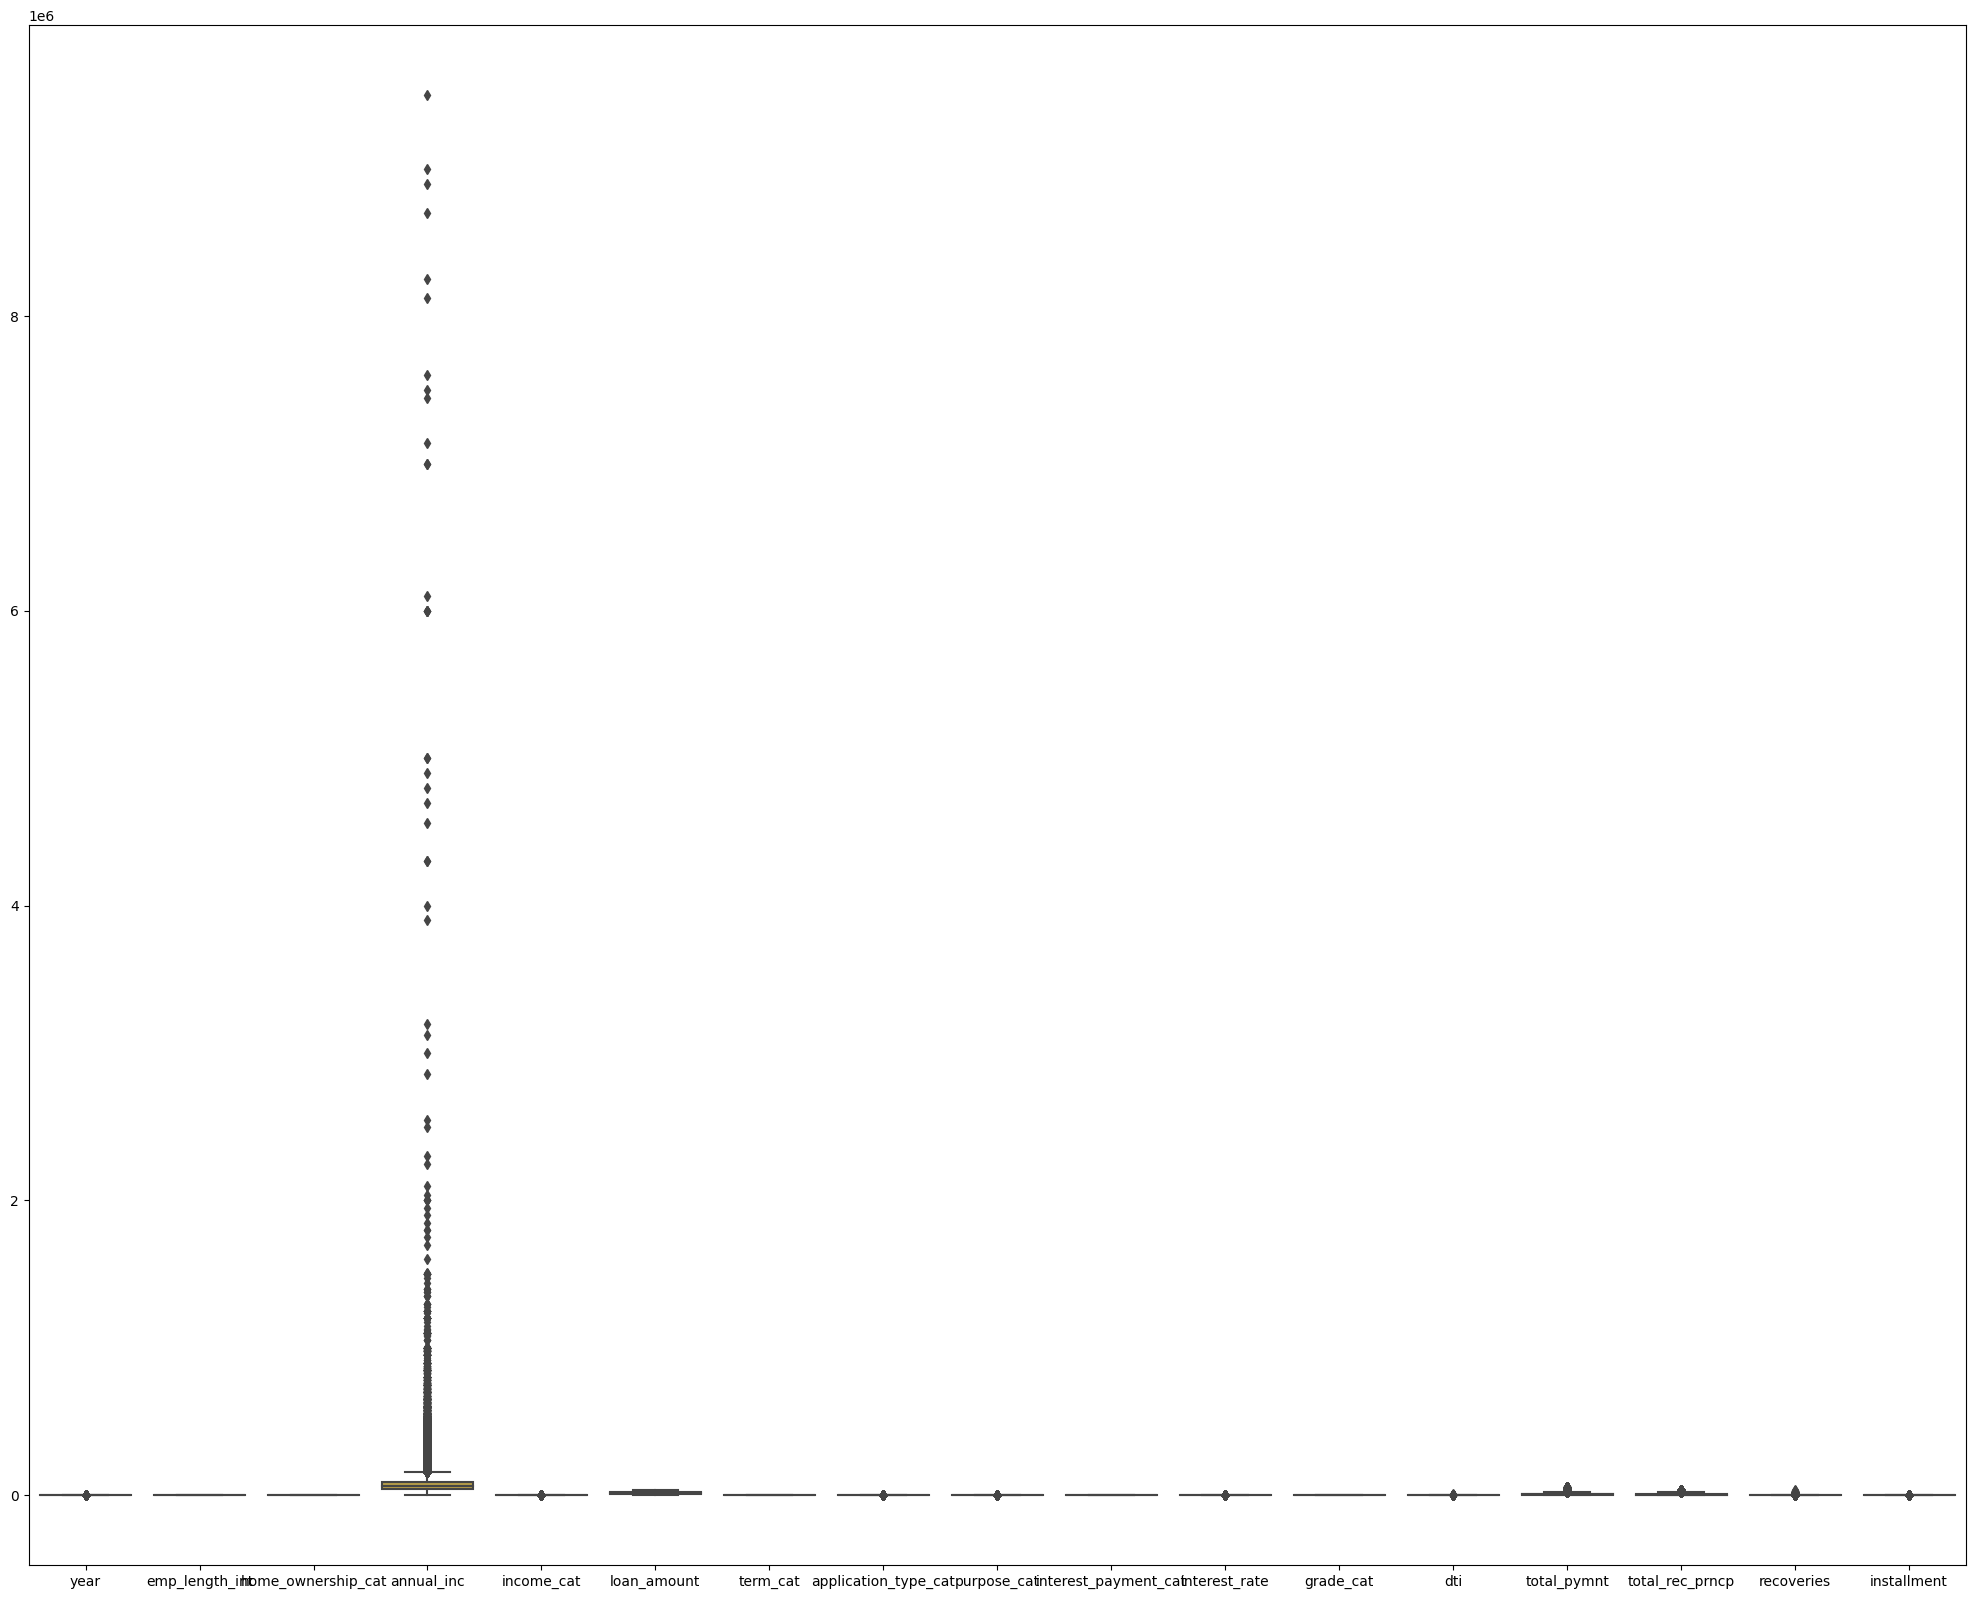

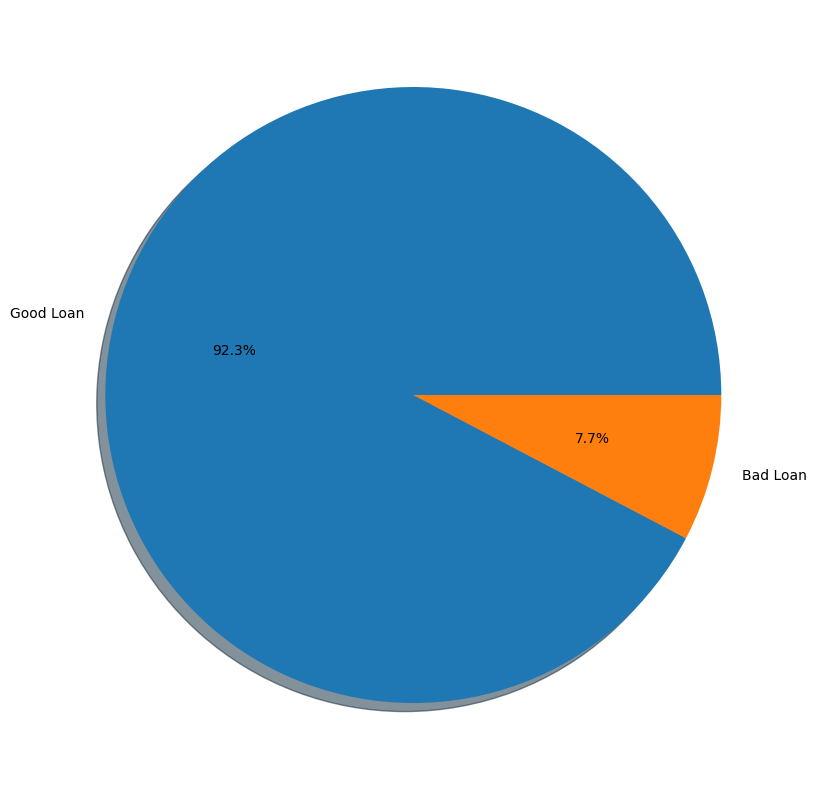

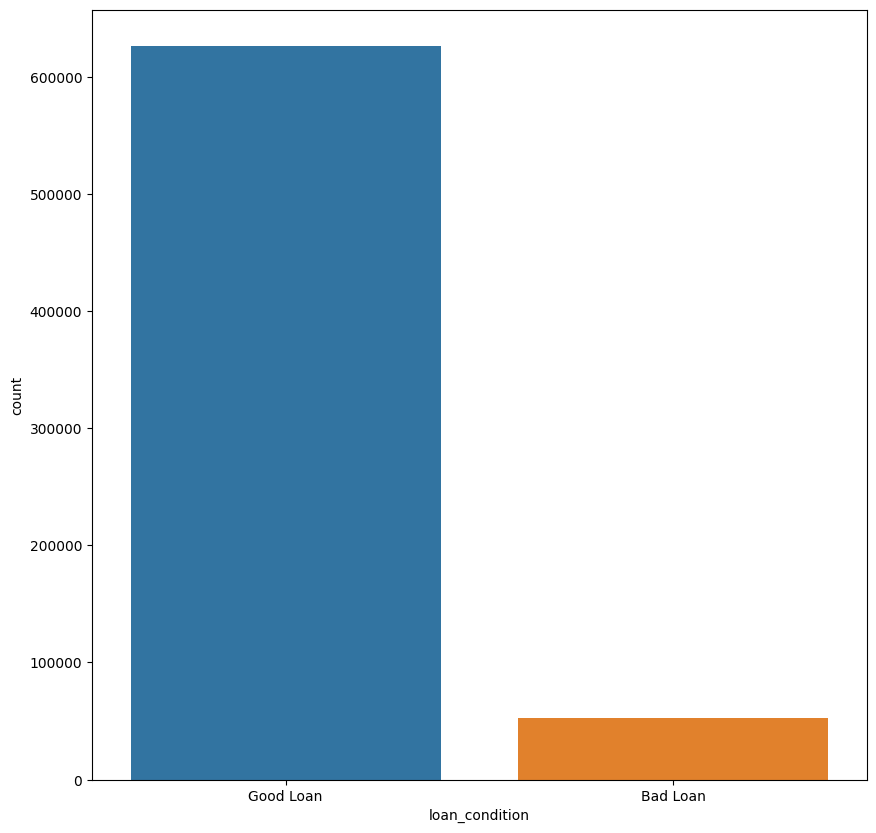

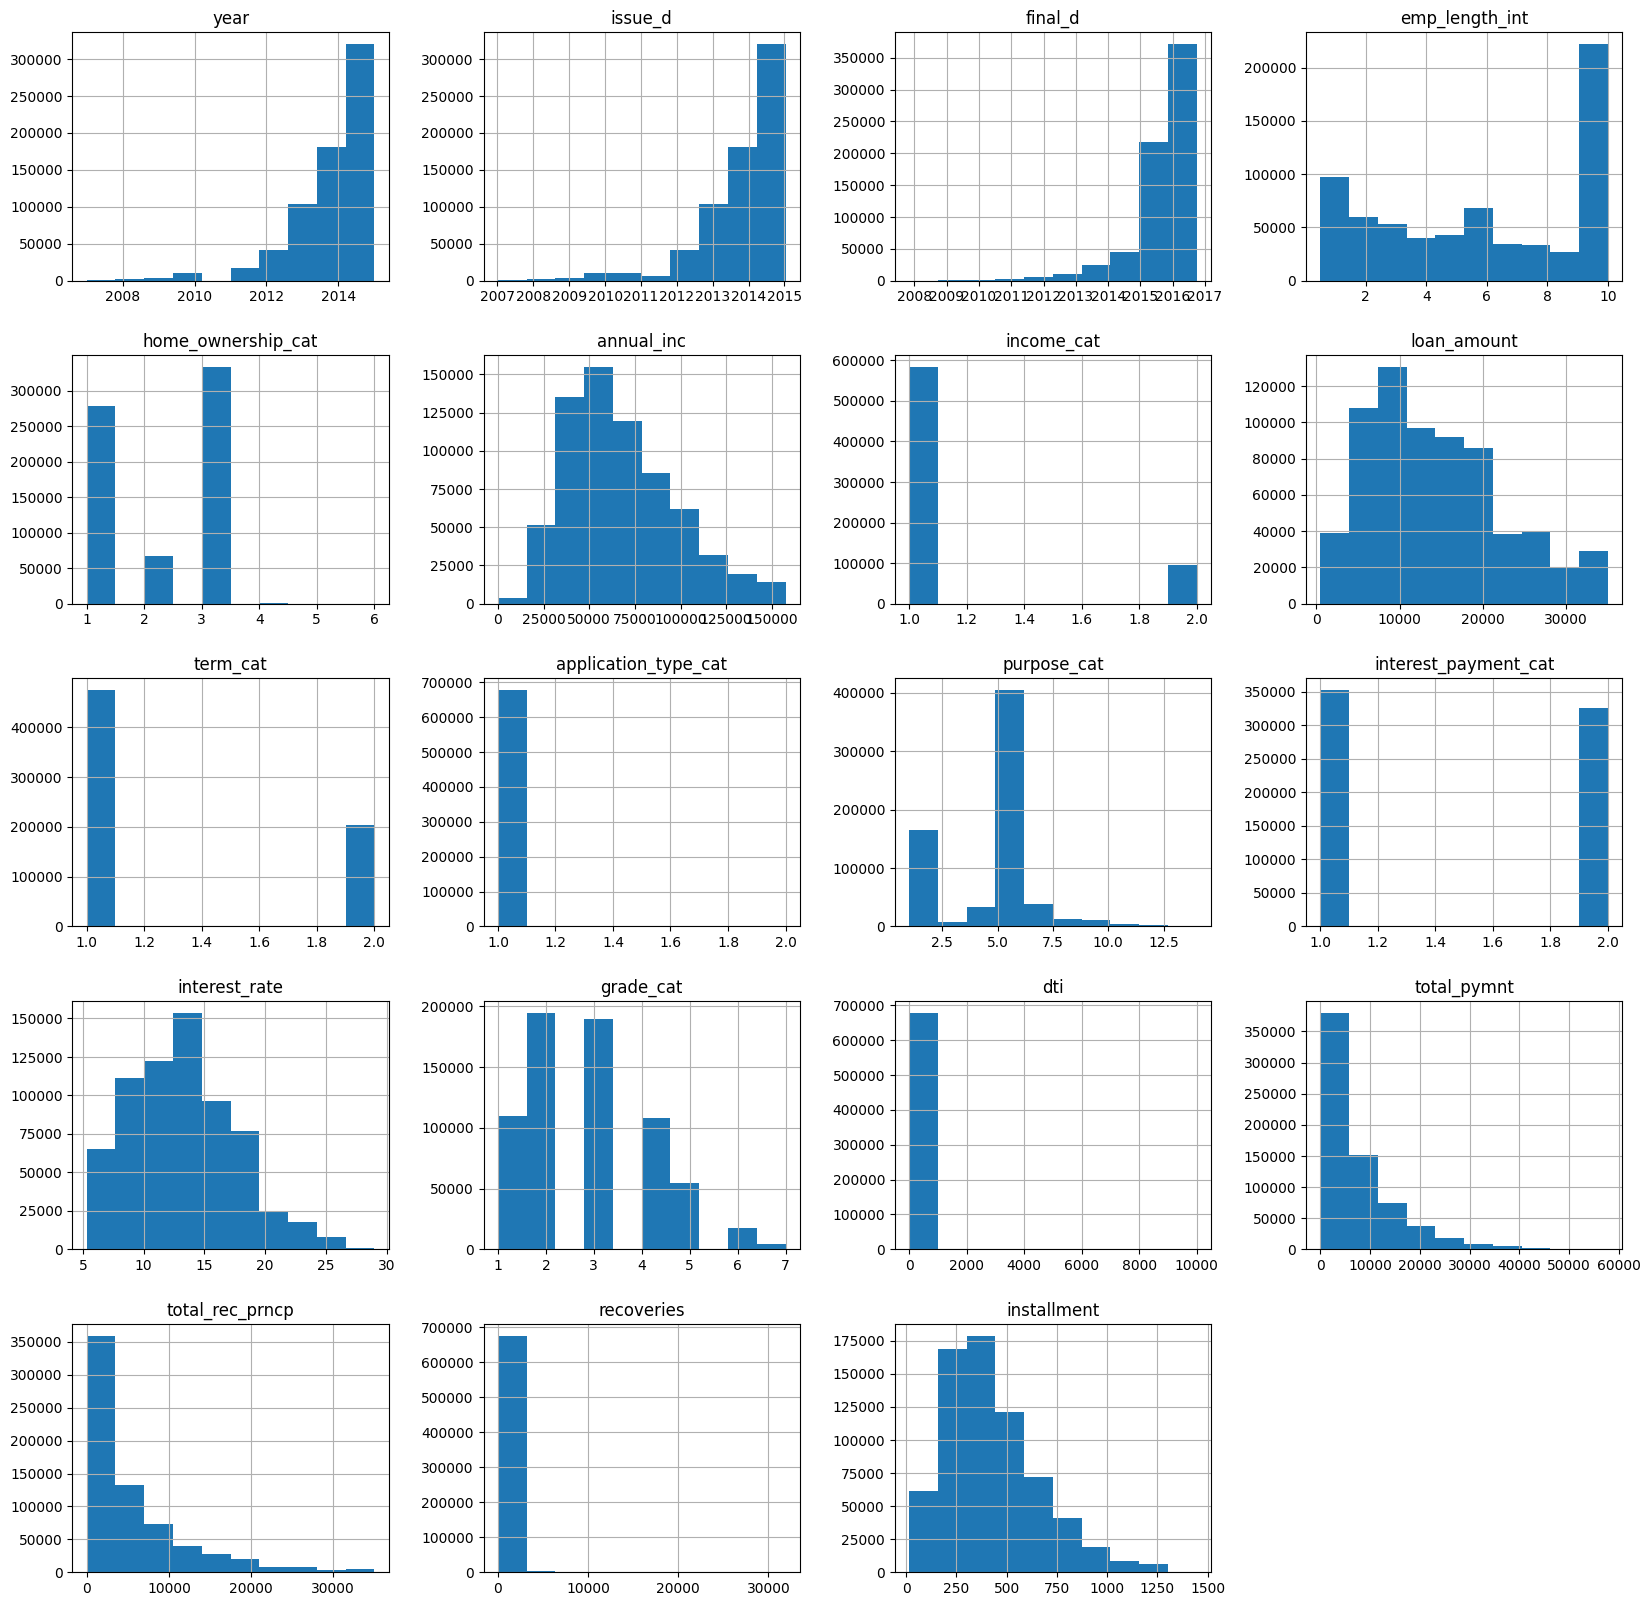

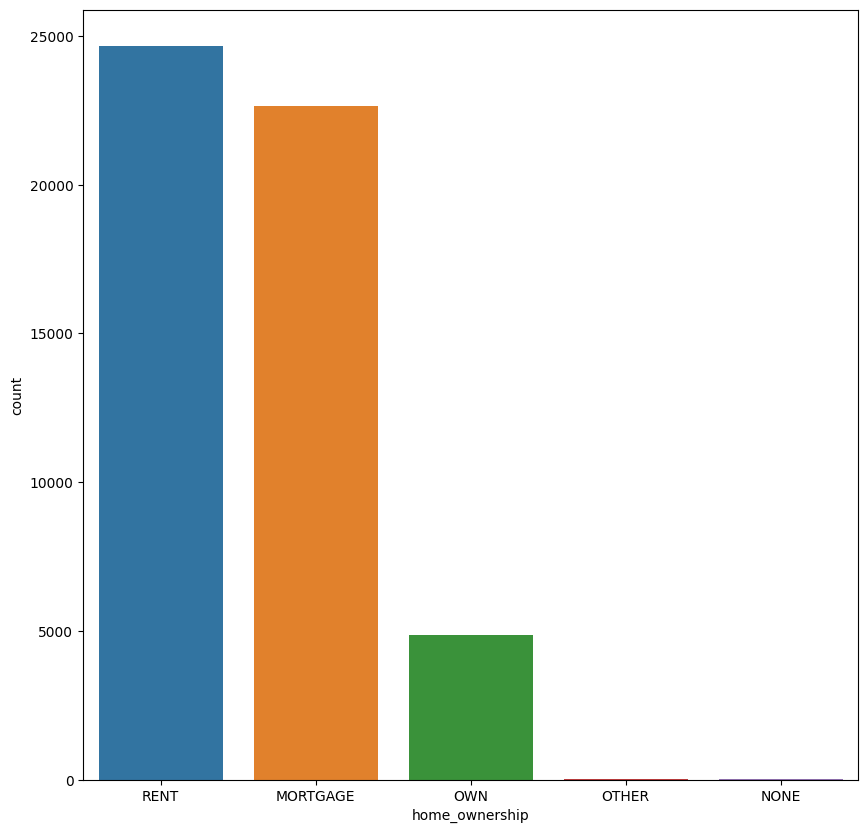

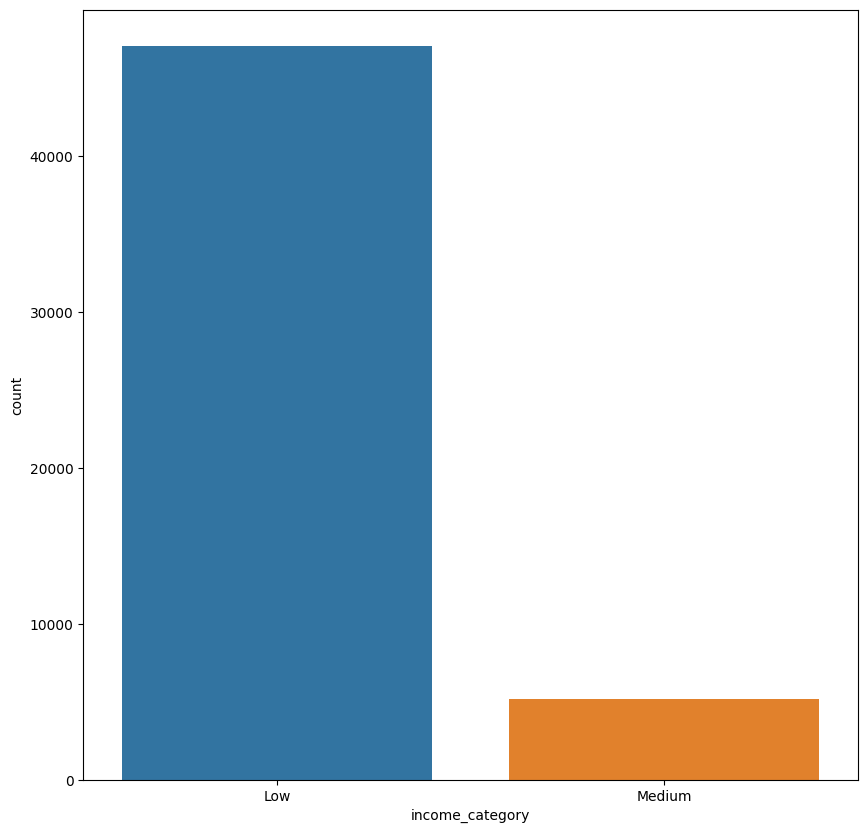

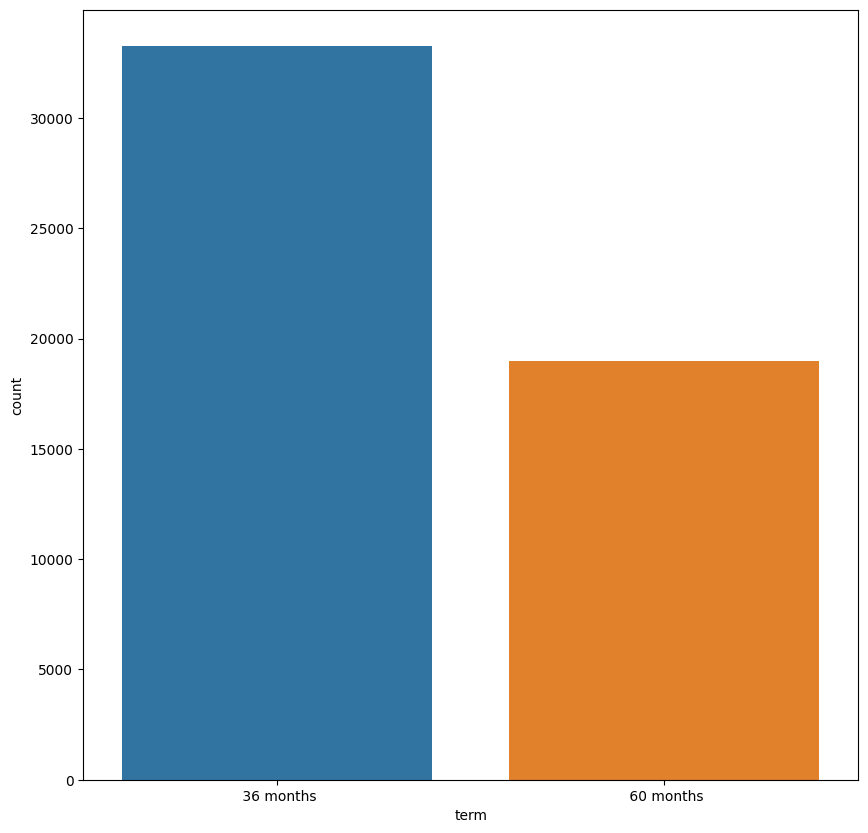

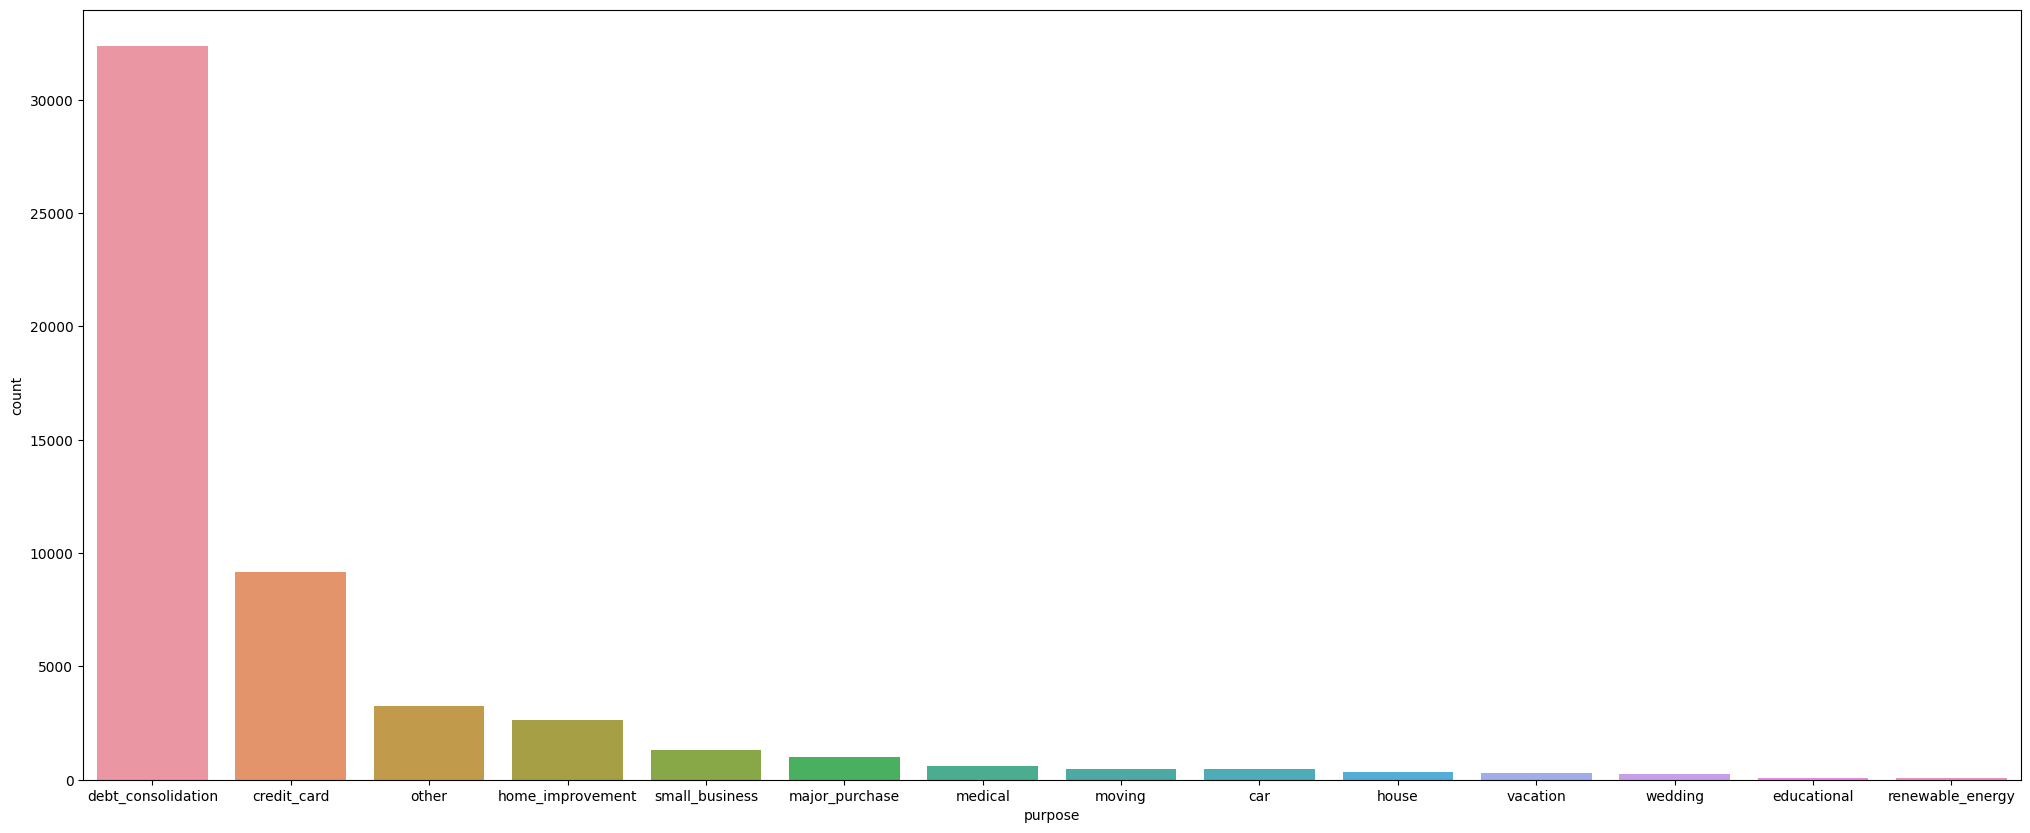

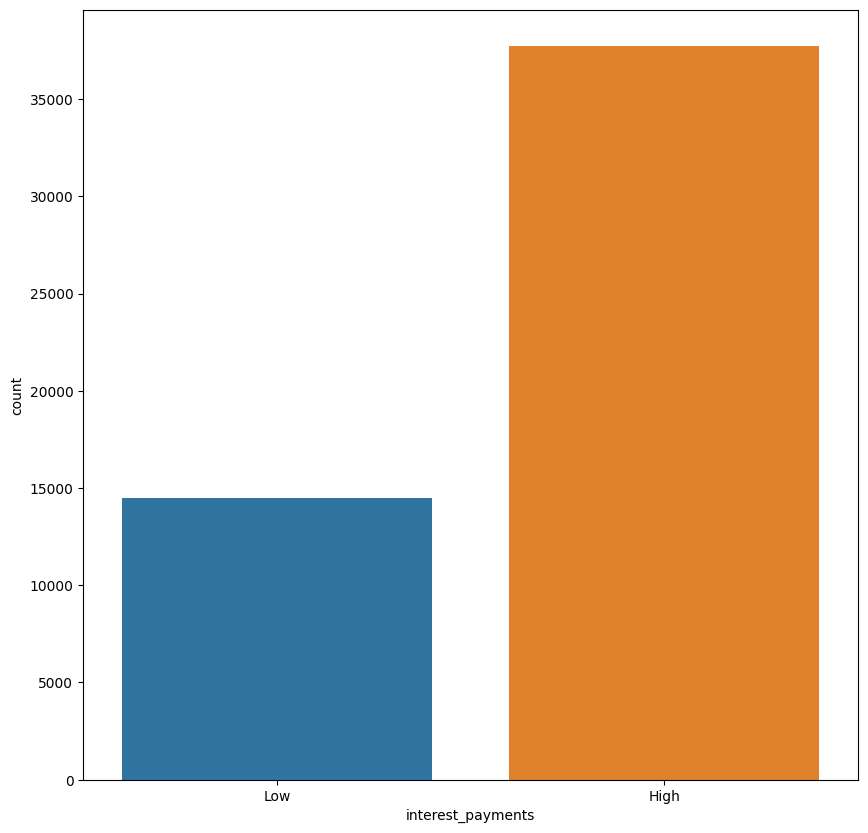

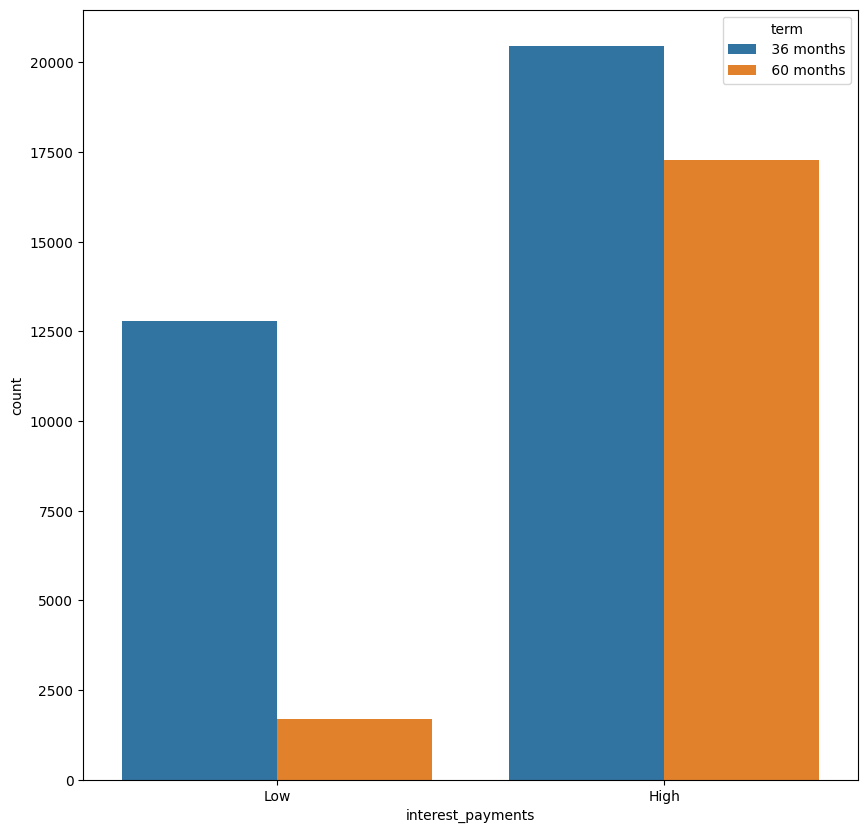

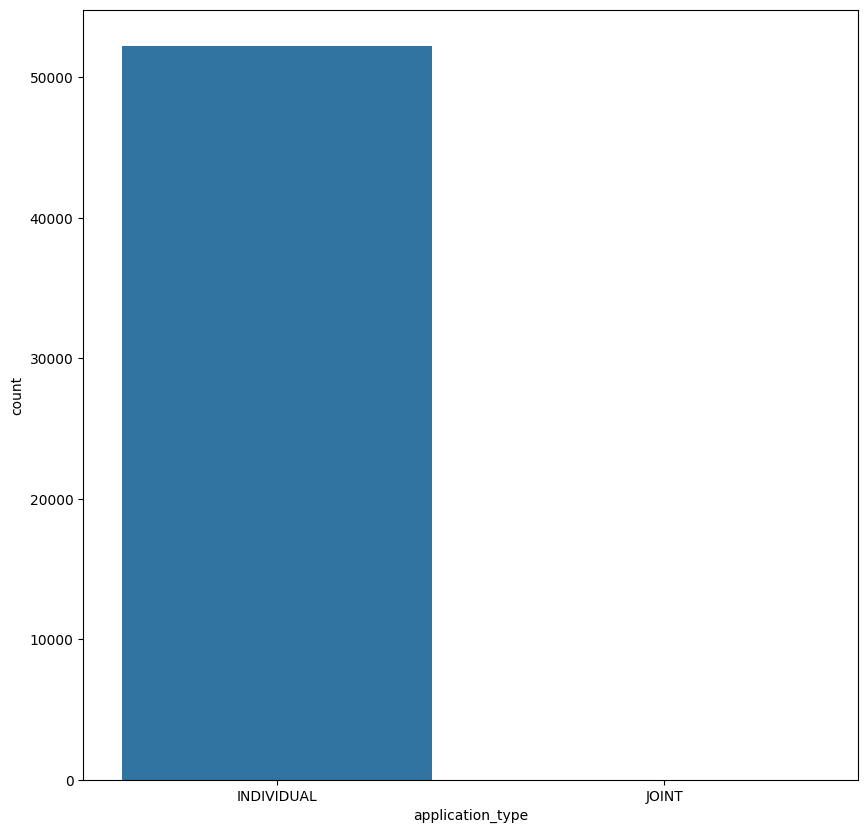

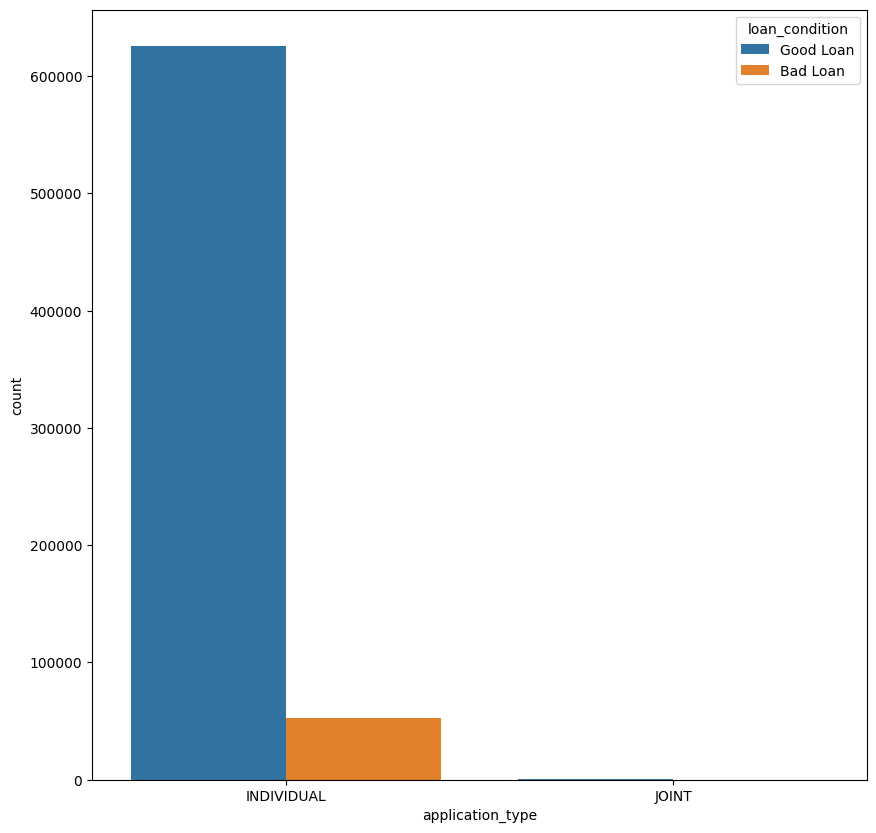

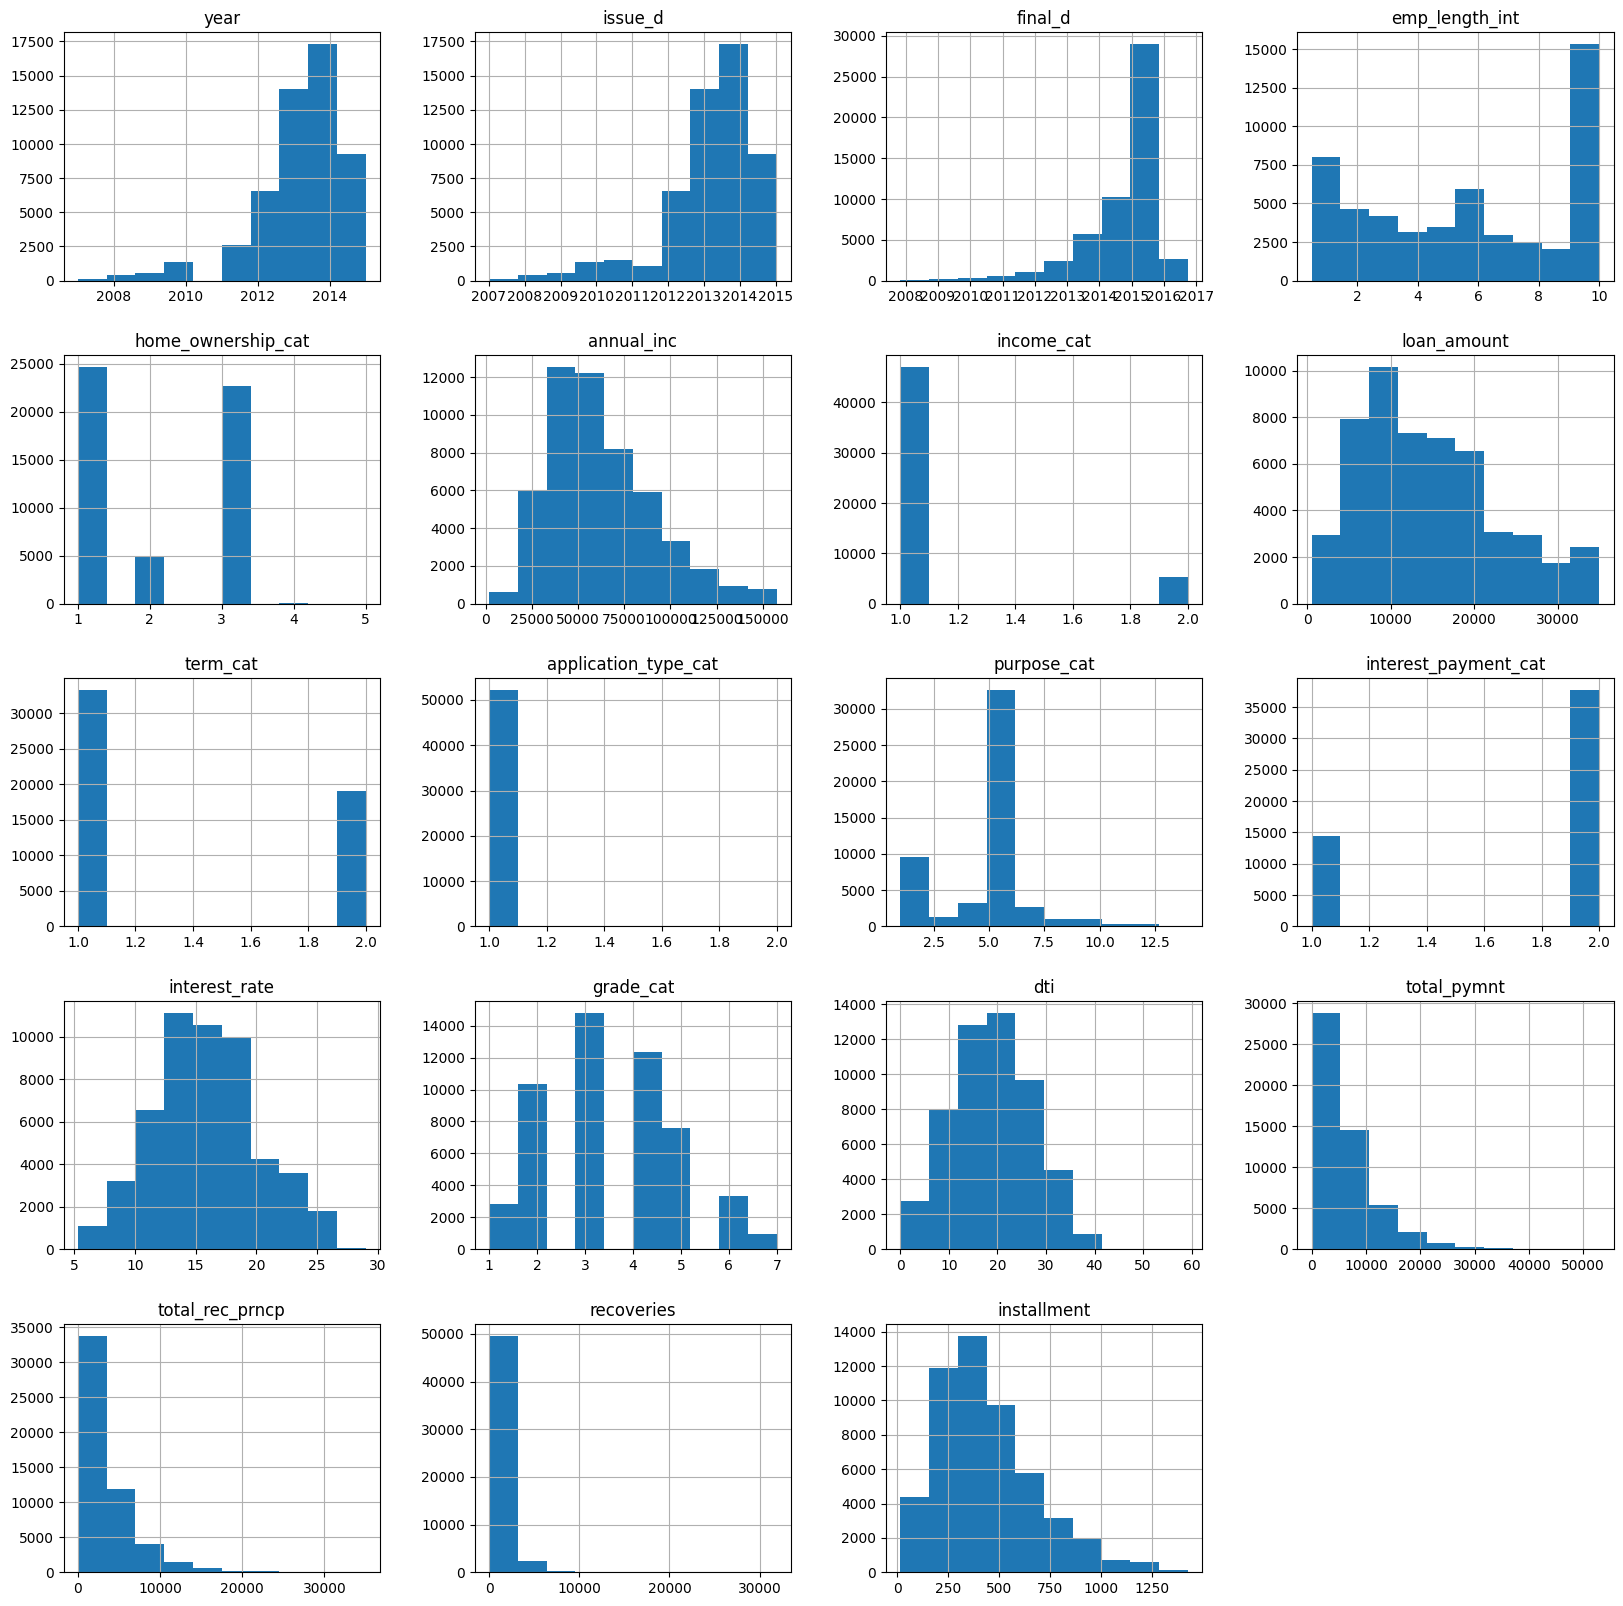

<Figure size 2000x2000 with 0 Axes>

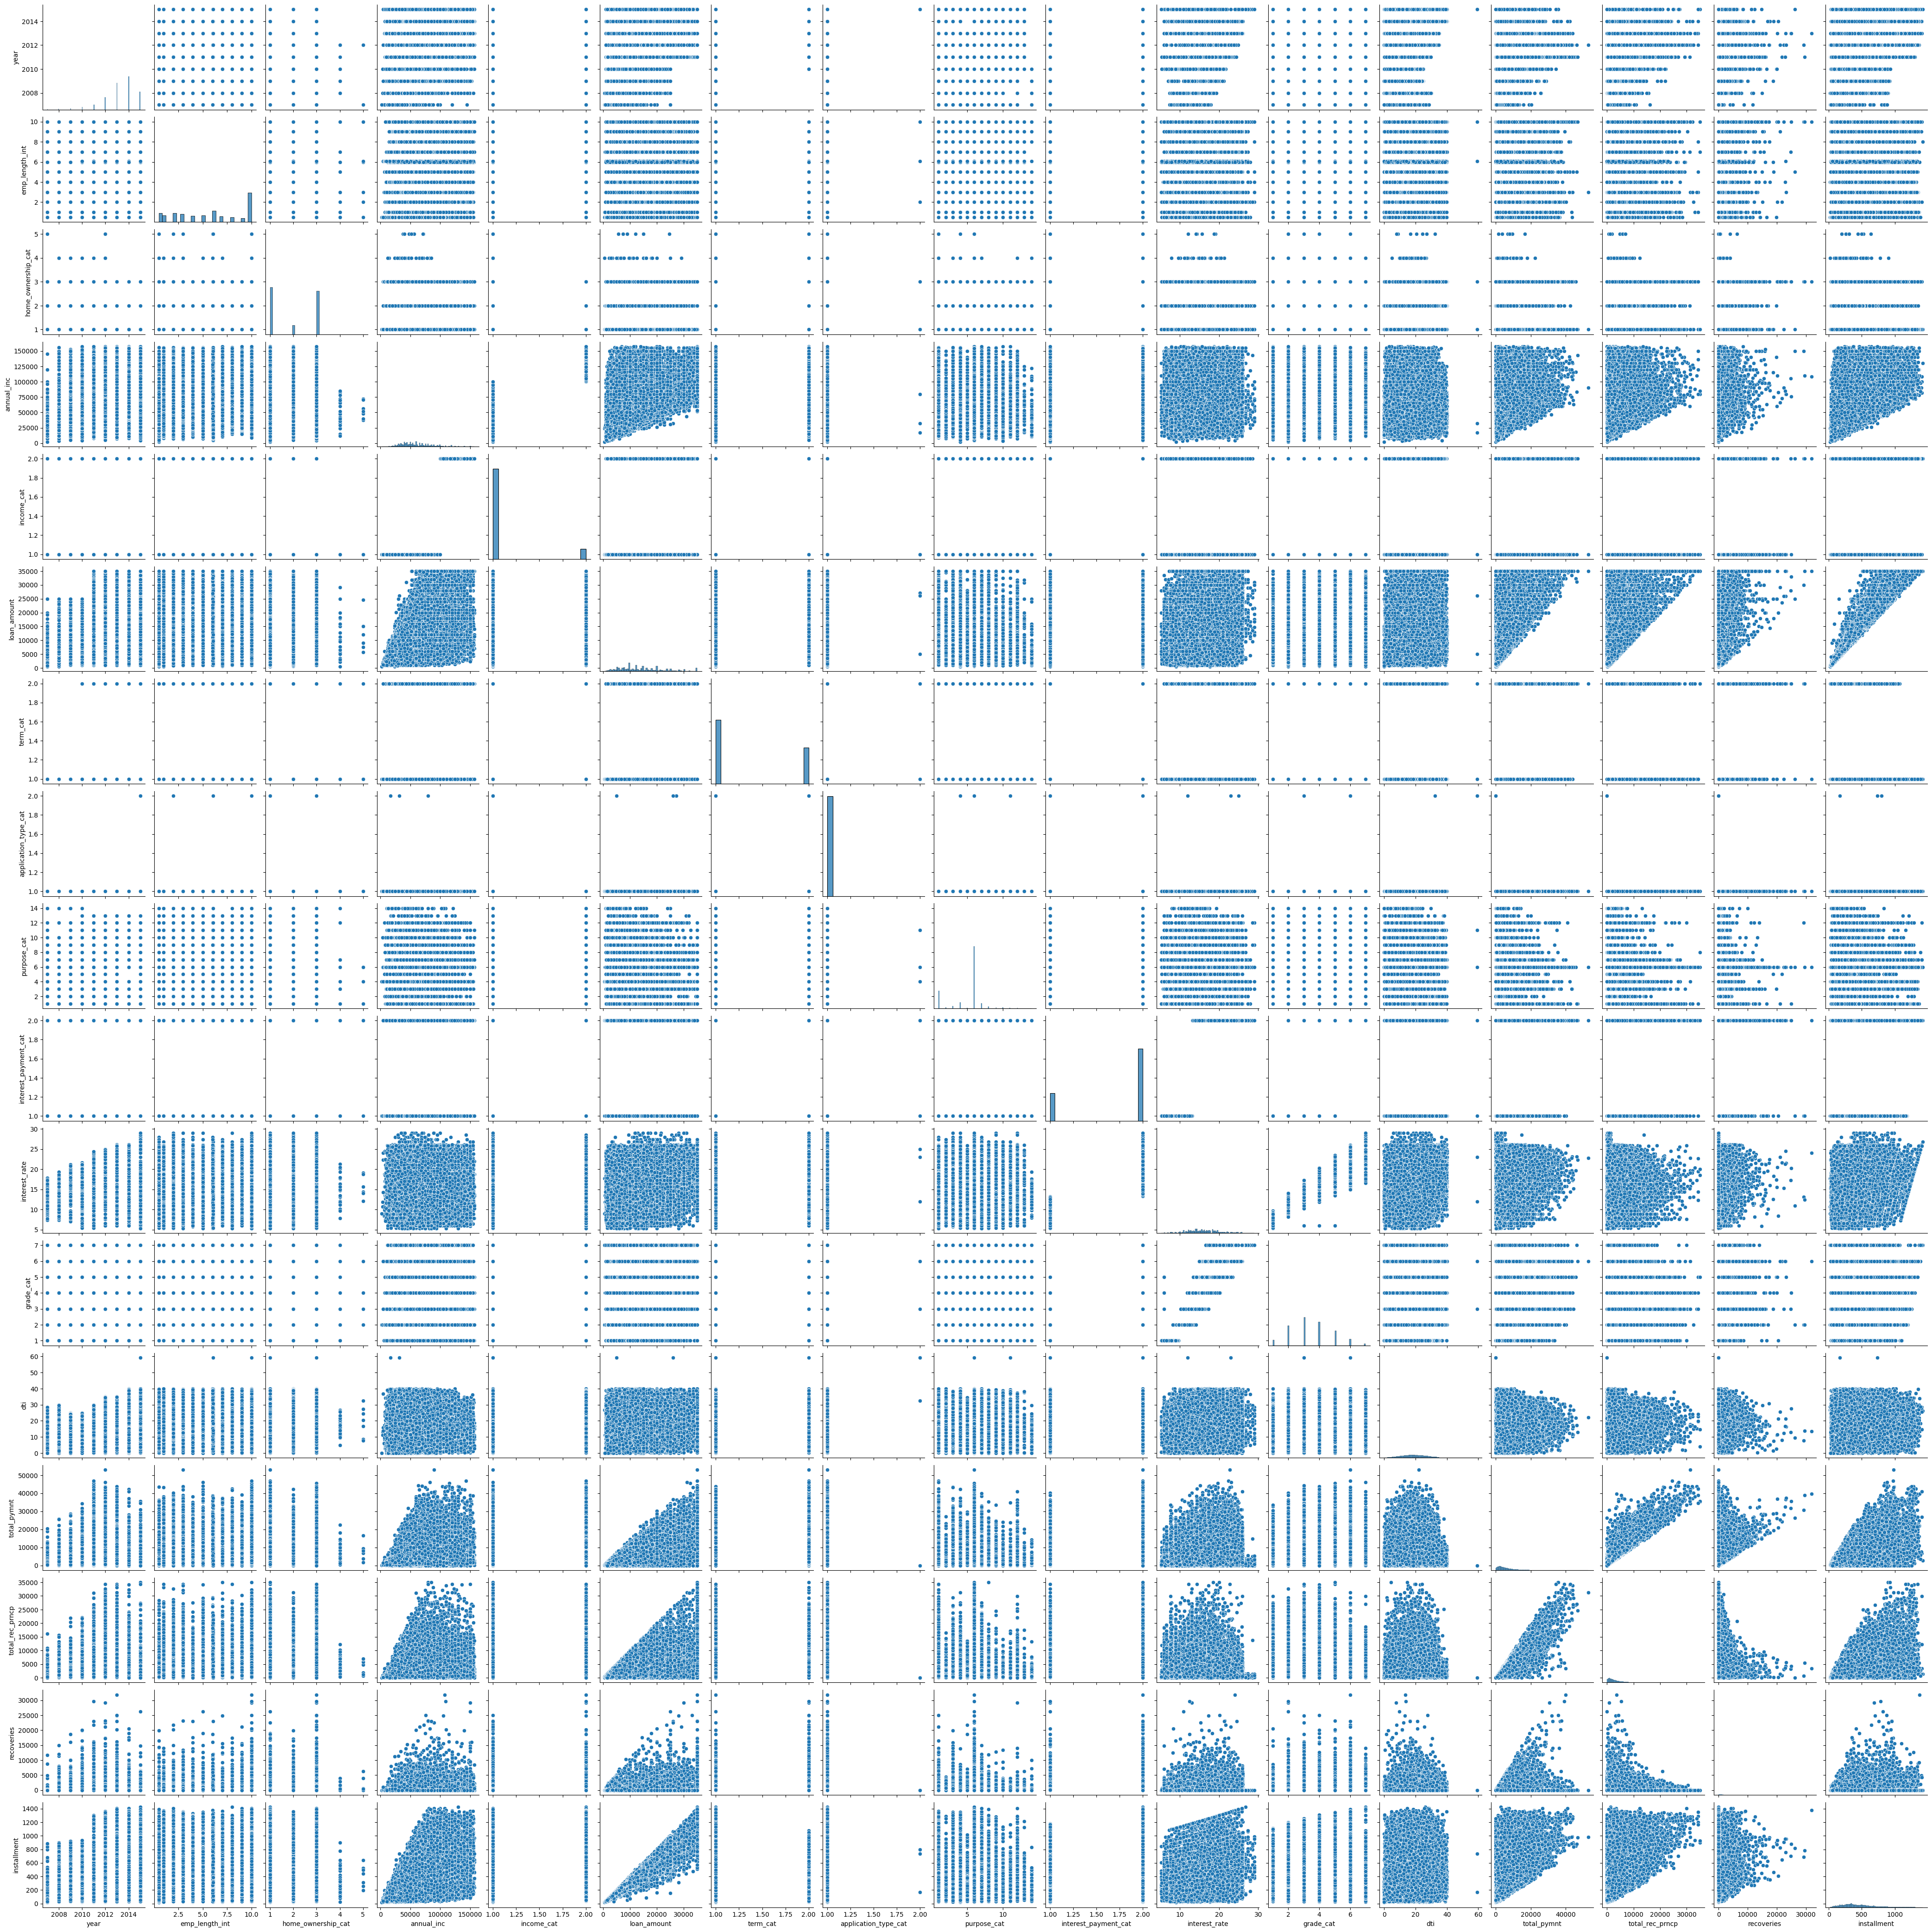

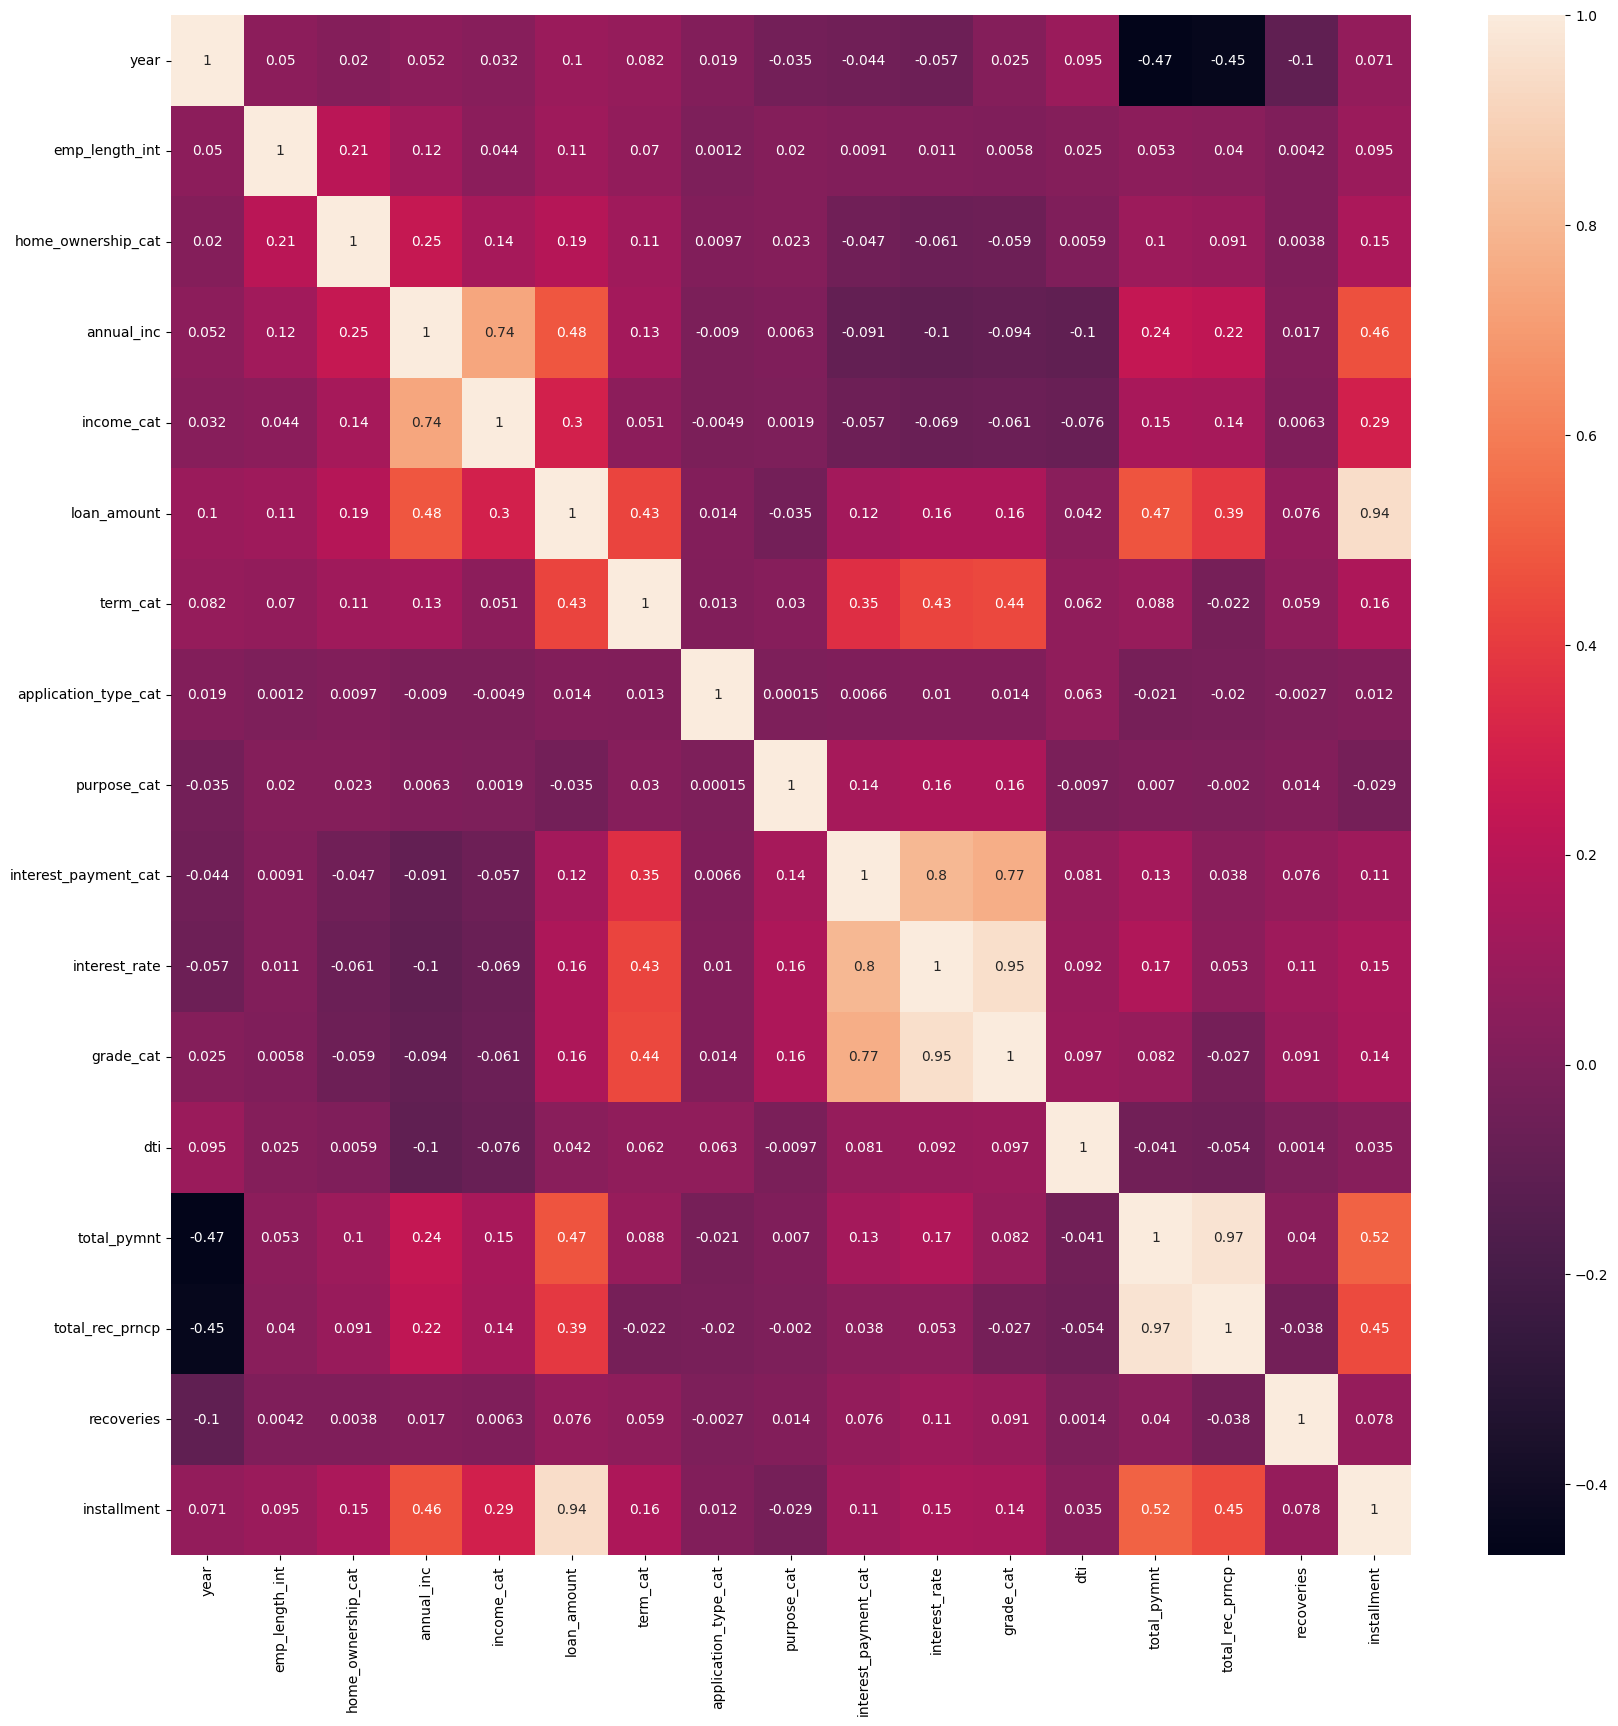

In [23]:
eda(X_train, y_train, X_test, y_test)